In [1]:
%cd ..

import matplotlib.axes._axes as axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

from src.gabor_analysis.gabor_fit import GaborFit
from src.spikeloader import SpikeLoader

sns.set()
sns.set_style('white')

/Users/chaichontat/Documents/GitHub/janelia2020


In [2]:
f = SpikeLoader.from_hdf5('data/processed.hdf5')
g = GaborFit.from_hdf5('data/gabor.hdf5')
deg = 2.5

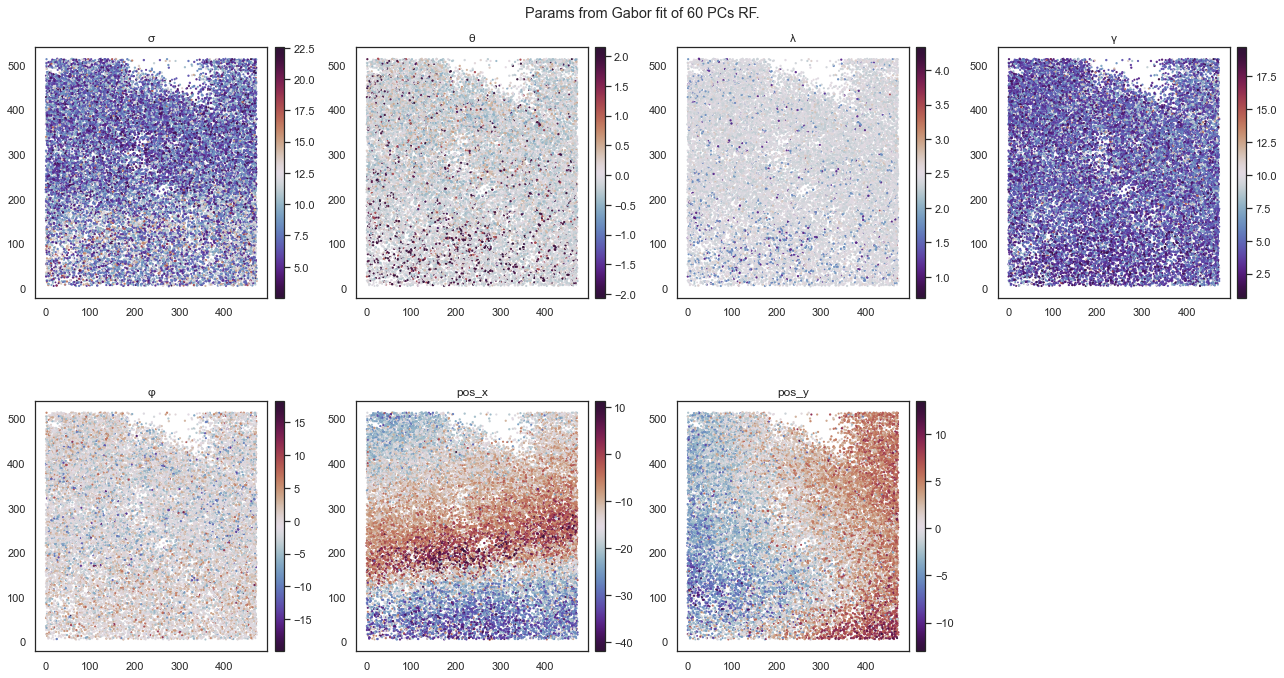

In [3]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 10))
axs = axs.flatten()
cmap = 'twilight_shifted'

for i, name in enumerate(GaborFit.KEY.keys()):
    u = axs[i].scatter(f.pos['x'], f.pos['y'], s=2 * g.corr, c=deg * g.params_fit[:, i], cmap=cmap, alpha=0.9)
    axs[i].grid(0)
    axs[i].set_title(name)
    axs[i].set_aspect('equal')
    divider = make_axes_locatable(axs[i])
    cax = divider.append_axes("right", size="4%", pad=0.1, )
    fig.colorbar(u, cax=cax,)

fig.delaxes(axs[-1])
fig.suptitle('Params from Gabor fit of 60 PCs RF.')
plt.tight_layout()
plt.show()

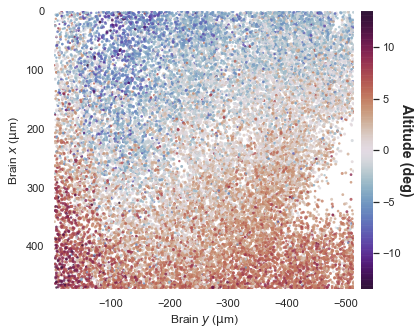

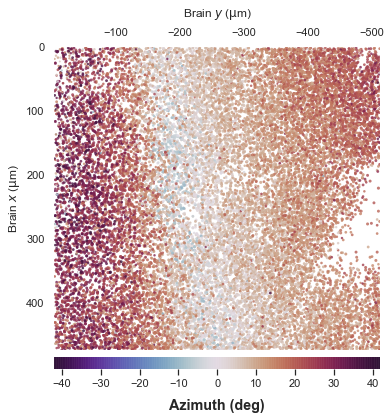

In [4]:
def plot_scatter(ax, p, title):
    sns.set_style('whitegrid')
    scale = np.max(np.abs(p))
    u = ax.scatter(x := -np.array(f.pos['y'], dtype=np.int16), y := np.array(f.pos['x'], dtype=np.int16),
                   s=10 * g.corr, c=p, linewidth=0,
                   cmap=cmap, alpha=0.8, vmin=-scale, vmax=scale)
    ax.grid(0)
    ax.set_aspect('equal')
    ax.set_xlabel('Brain $y$ ($\mathrm{\mu}$m)')
    ax.set_ylabel('Brain $x$ ($\mathrm{\mu}$m)')
    ax.set_xlim([np.max(x), np.min(x)])
    ax.set_ylim([np.min(y), np.max(y)])
    ax.set_ylim(ax.get_ylim()[::-1])

    for spine in ax.spines.values():
        spine.set_visible(False)

    divider = make_axes_locatable(ax)
    if title == 'Altitude':
        cax = divider.append_axes("right", size="4%", pad=0.1, )
        cbar = fig.colorbar(u, cax=cax, )
        cbar.ax.set_ylabel('Altitude (deg)', rotation=270, fontweight='bold', fontsize='large', labelpad=12)

    else:
        cax = divider.append_axes("bottom", size="4%", pad=0.1, )
        cbar = fig.colorbar(u, cax=cax, orientation='horizontal')
        cbar.ax.set_xlabel('Azimuth (deg)', fontweight='bold', fontsize='large', labelpad=10)

        ax.xaxis.set_ticks_position('top')
        ax.tick_params(color='white')
        ax.xaxis.set_label_position('top')
        ax.xaxis.set_label_coords(0.5, 1.1)  # 1 is top, right

    cbar.outline.set_visible(False)


fig, ax = plt.subplots(figsize=(6, 6))
plot_scatter(ax, deg * g.params_fit[:, -1], 'Altitude')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
plot_scatter(ax, deg * -g.params_fit[:, -2], 'Azimuth')
plt.tight_layout()
plt.show()


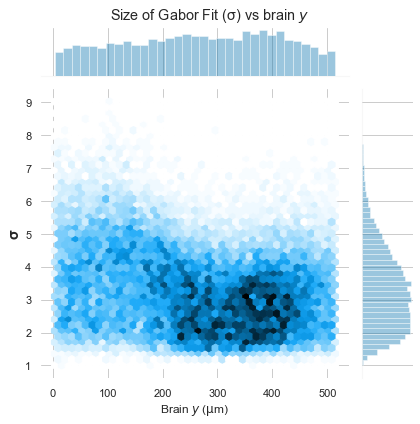

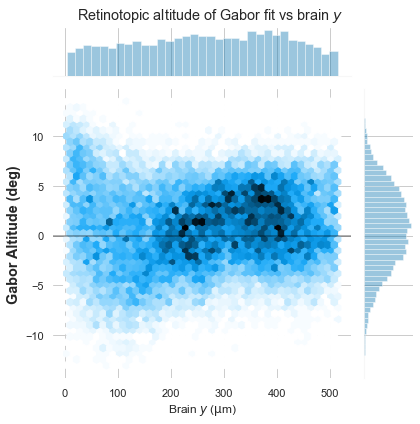

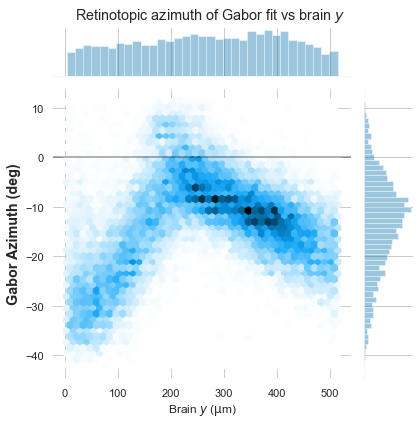

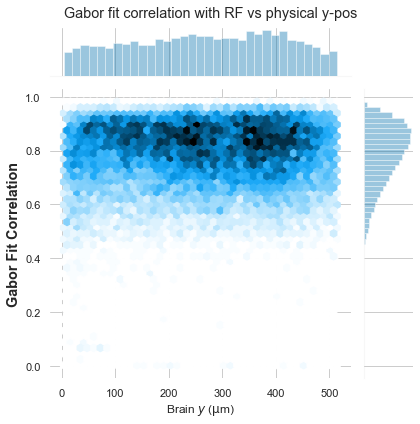

In [5]:
def make_hexplot(var, name, axis, title=None, save=None, line=False):
    with sns.color_palette('colorblind', desat=0.95):
        df = pd.DataFrame([f.pos[axis], var]).T
        df.columns = [f'Brain ${axis}$ ($\mathrm{{\mu}}$m)', name]
        g = sns.jointplot(data=df, x=df.columns[0], y=df.columns[1], kind='hex')
        g.fig.suptitle(title)

        for sp in g.ax_joint.spines.values():
            sp.set_visible(False)

        g.ax_joint.set_ylabel(name, fontweight='bold', fontsize='large')

        ax: axes.Axes
        for ax in [g.ax_marg_x, g.ax_marg_y]:
            for sp in ax.spines.values():
                sp.set_alpha(0.15)

        if line:
            ax = g.ax_joint
            ax.axhline(color='black', alpha=0.4)

        if save:
            plt.savefig(save)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()


make_hexplot(g.params_fit[:, 0], 'σ', 'y', 'Size of Gabor Fit (σ) vs brain $y$')
make_hexplot(deg * g.params_fit[:, -1], 'Gabor Altitude (deg)', 'y', 'Retinotopic altitude of Gabor fit vs brain $y$',
             line=True)
make_hexplot(deg * g.params_fit[:, -2], 'Gabor Azimuth (deg)', 'y', 'Retinotopic azimuth of Gabor fit vs brain $y$',
             line=True)
make_hexplot(g.corr, 'Gabor Fit Correlation', 'y', 'Gabor fit correlation with RF vs physical y-pos')
